# K-Means Clustering
### Using Mall Customers Dataset

![Steps](k-means-steps.png)

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Read data file using pandas

In [49]:
df = pd.read_csv('./mall-customers.csv')
df.head(6)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76


### Get column names

In [50]:
_, gender_col, age_col, income_col, score_col = df.keys()
income_col

'Annual Income (k$)'

## Visualize the data

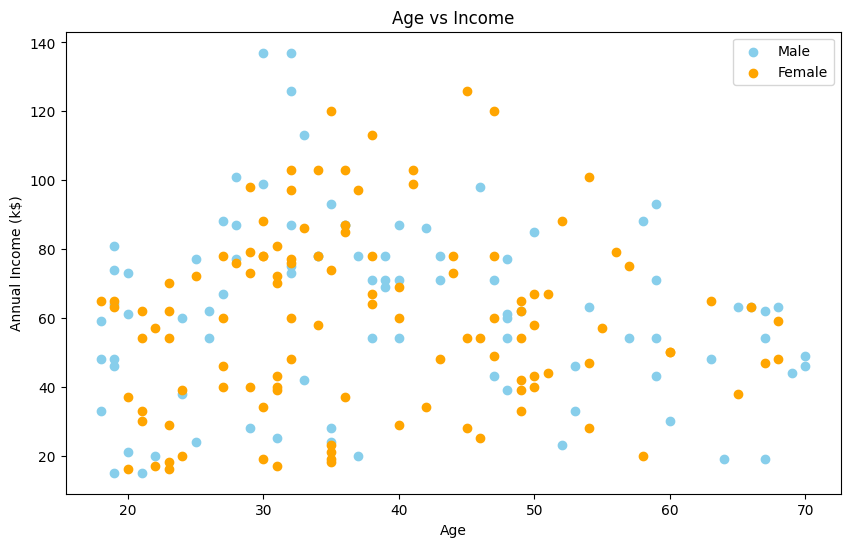

In [51]:
plt.figure(figsize=(10, 6))

male_df = df[df[gender_col] == 'Male']
female_df = df[df[gender_col] == 'Female']
plt.scatter(x=male_df[age_col], y=male_df[income_col], color='skyblue', label="Male")
plt.scatter(x=female_df[age_col], y=female_df[income_col], color='orange', label="Female")

plt.xlabel(age_col)
plt.ylabel(income_col)
plt.title("Age vs Income")
plt.legend()
plt.show()

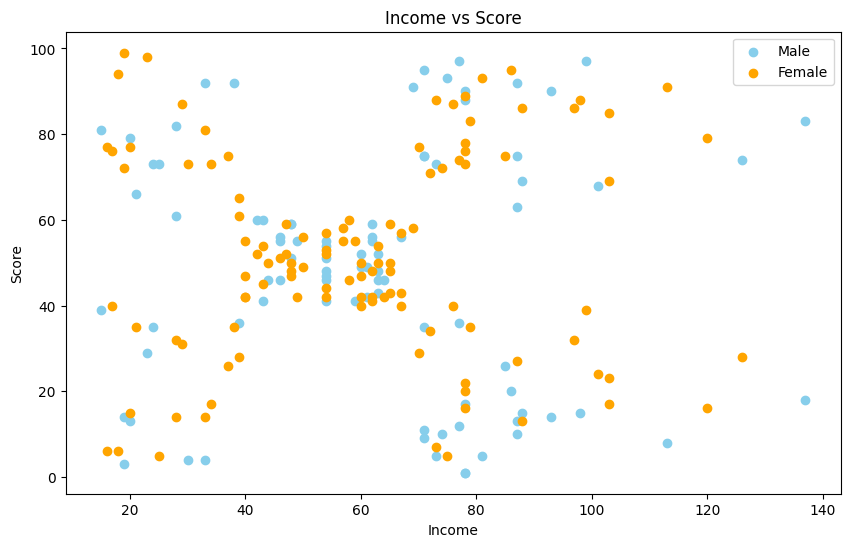

In [52]:
plt.figure(figsize=(10, 6))
plt.scatter(x=male_df[income_col], y=male_df[score_col], color='skyblue', label="Male")
plt.scatter(x=female_df[income_col], y=female_df[score_col], color='orange', label="Female")
plt.title("Income vs Score")
plt.xlabel("Income")
plt.ylabel("Score")
plt.legend()
plt.show()

### Helper functions

In [53]:
def compute_distance_to_centroid(data_points: np.ndarray, centroid: np.ndarray) -> np.ndarray:
    """
    Compute the distances between data points to given centroid using distance formula.
    """
    return np.sum((data_points - centroid) ** 2, axis=1)


In [54]:
def compute_new_centroid(data_points: np.ndarray) -> np.ndarray:
    return np.mean(data_points, axis=0)

## The Algorithm

In [55]:
def kmeans_clustering(data_points: np.ndarray, centroids: np.ndarray) -> tuple[list[np.ndarray], np.ndarray]:
    k = len(centroids)
    distances = np.zeros((len(data_points), k))

    # compute distances to each centroid
    for index in range(k):
        centroid = centroids[index]
        distance = compute_distance_to_centroid(data_points, centroid)

        distances[:, index] = distance

    # find centroid index with minimum distance for each point
    min_distance_centroids = np.argmin(distances, axis=1)

    # assign cluster for each data point
    kmeans_clusters = []
    new_centroids = np.zeros_like(centroids)
    for index in range(k):
        cluster_points = data[min_distance_centroids == index]
        new_centroid = compute_new_centroid(cluster_points)

        kmeans_clusters.append(cluster_points)
        new_centroids[index] = new_centroid

    return kmeans_clusters, new_centroids


### Helper function for visualization

In [56]:
colors = ['skyblue', 'orange', 'green', 'tomato', 'purple', 'darkviolet', 'magenta', 'black', 'gray', 'cyan']


def visualize_clusters(clusters: list[np.ndarray], centroids: np.ndarray, title: str, xlabel: str, ylabel: str) -> None:
    plt.figure(figsize=(10, 6))

    # plot data points
    for index in range(len(clusters)):
        data_points = clusters[index]
        plt.scatter(x=data_points[:, 0], y=data_points[:, 1], color=colors[index])

    plt.scatter(x=centroids[:, 0], y=centroids[:, 1], color='red', marker='*', s=200)

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

### Putting everything together

**Analyzing income vs spending score**

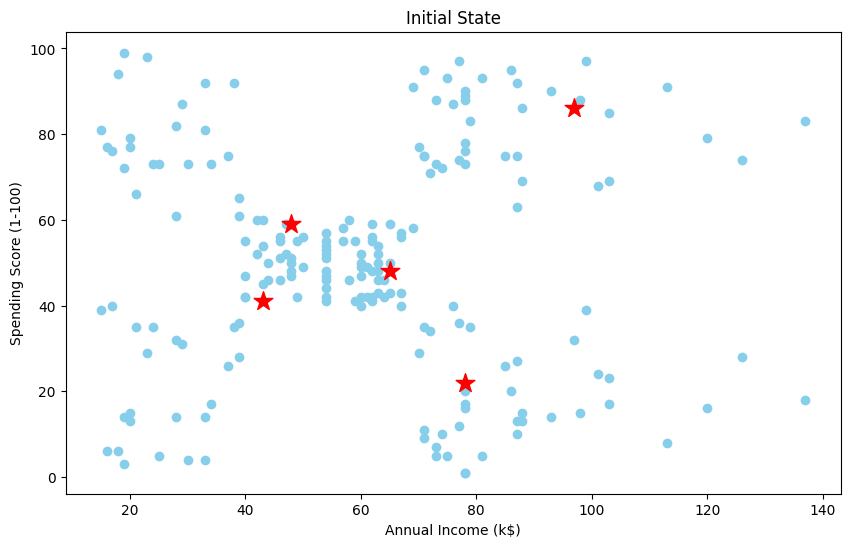

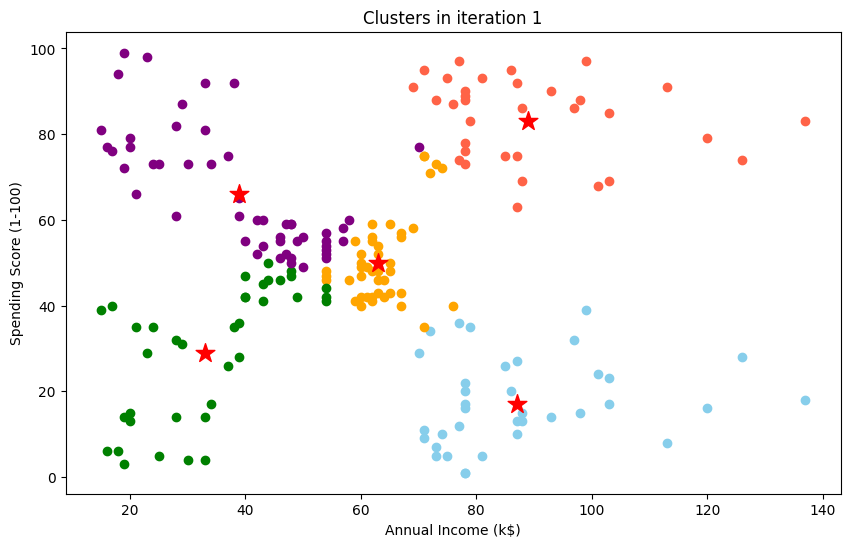

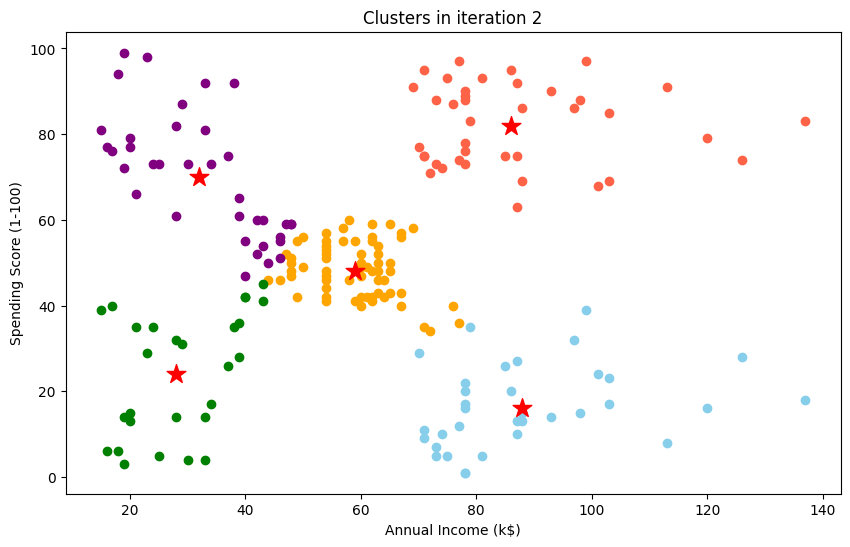

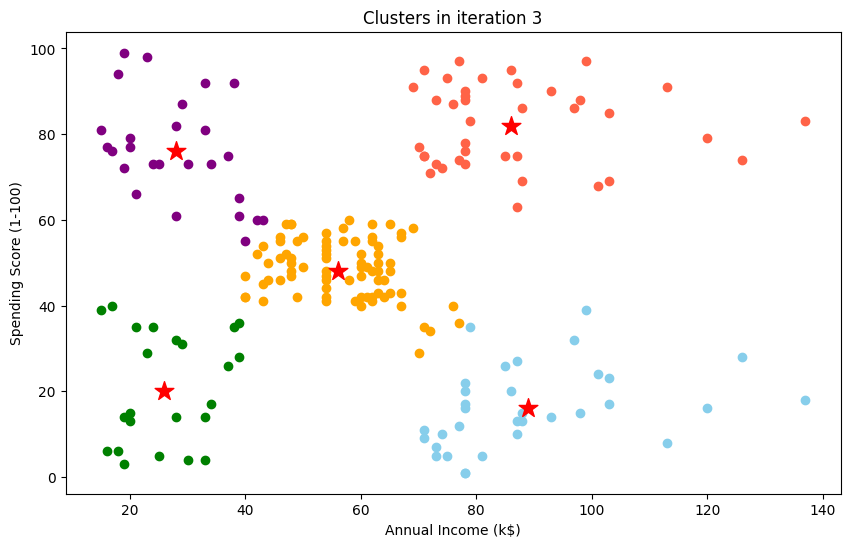

In [57]:
data = df[[income_col, score_col]].to_numpy()

# no. of clusters and initial random centroids
k = 5
centroid_indexes = np.random.choice(len(data), size=k, replace=False)
# centroid_indexes = list(range(k))
centroids = data[centroid_indexes]

# initially no clusters
visualize_clusters([data], centroids, 'Initial State', xlabel=income_col, ylabel=score_col)

# no. of iterations
no_of_iterations = 3

# running the algorithm
for iteration in range(no_of_iterations):
    clusters, centroids = kmeans_clustering(data, centroids)

    visualize_clusters(
        clusters,
        centroids,
        f'Clusters in iteration {iteration + 1}',
        xlabel=income_col,
        ylabel=score_col,
    )

